In [1]:
#  add karna-python-backend to the path
import sys
sys.path.append('C:/Users/Prince/Documents/GitHub/Proejct-Karna/offline-ai-assistant/karna-python-backend')

from importlib import reload  # Not needed in Python 2
import logging
reload(logging)
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.DEBUG, datefmt='%I:%M:%S')

logger = logging.getLogger(__name__)

import os
import json
from typing import List
from datetime import datetime
from config.paths import workspace_data_dir, workspace_dir
from omni_helper import get_omniparser_inference_data, OmniParserResultModel
from services.screen_capture_service import ScreenshotEvent

05:25:20 INFO:NumExpr defaulting to 12 threads.
05:25:22 DEBUG:matplotlib data path: c:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\venv\lib\site-packages\matplotlib\mpl-data
05:25:22 DEBUG:CONFIGDIR=C:\Users\Prince\.matplotlib
05:25:22 DEBUG:interactive is False
05:25:22 DEBUG:platform is win32
05:25:22 DEBUG:CACHEDIR=C:\Users\Prince\.matplotlib
05:25:22 DEBUG:Using fontManager instance from C:\Users\Prince\.matplotlib\fontlist-v390.json


In [2]:
def run_omniparser_inference(json_file_path: str):
    logger.info(f"Loading screenshot events from JSON file: {json_file_path}")
        
    if not os.path.exists(json_file_path):
        raise FileNotFoundError(f"JSON file not found: {json_file_path}")
    
    try:
        with open(json_file_path, 'r', encoding='utf-8') as f:
            events_data = json.load(f)
    except json.JSONDecodeError as e:
        raise ValueError(f"Invalid JSON in file: {str(e)}")
    
    if not events_data or not isinstance(events_data, list):
        raise ValueError("JSON file does not contain a list of screenshot events")
    
    # Convert JSON data to ScreenshotEvent objects
    screenshot_events = []
    for event_dict in events_data:
        # Convert ISO format string back to datetime
        if 'timestamp' in event_dict:
            event_dict['timestamp'] = datetime.fromisoformat(event_dict['timestamp']) # type: ignore
        
        screenshot_path = event_dict["screenshot_path"]
        # convert screenshot_path to proper path using paths config
        screenshot_path = workspace_dir / screenshot_path
        event_dict["screenshot_path"] = screenshot_path
        # Create ScreenshotEvent object
        try:
            event = ScreenshotEvent(**event_dict)
            screenshot_events.append(event)
        except (TypeError, ValueError) as e:
            logger.warning(f"Skipping invalid event: {str(e)}")
    
    logger.info(f"Loaded {len(screenshot_events)} screenshot events from JSON file")
    return get_omniparser_inference_data(screenshot_events)

In [3]:

omni_inference_data : list[OmniParserResultModel] = run_omniparser_inference(os.path.join(workspace_data_dir, 
                                                                        'youtube.com/123e4567-e89b-12d3-a456-426614174000/screenshot_events_123e4567-e89b-12d3-a456-426614174000.json'
                                                                        ))



05:25:29 INFO:Loading screenshot events from JSON file: C:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\data\youtube.com/123e4567-e89b-12d3-a456-426614174000/screenshot_events_123e4567-e89b-12d3-a456-426614174000.json
05:25:29 INFO:Loaded 2 screenshot events from JSON file
c:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\venv\lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
c:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\venv\lib\site-packages\timm\models\layers\__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} 

Omniparser initialized!!!
image size: (1920, 1080)

0: 736x1280 123 icons, 79.7ms
Speed: 7.3ms preprocess, 79.7ms inference, 51.2ms postprocess per image at shape (1, 3, 736, 1280)
len(filtered_boxes): 161 93


c:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\venv\lib\site-packages\transformers\generation\configuration_utils.py:649: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(


time to get parsed content: 0.6560788154602051


05:25:44 INFO:Created omniparser result for event_id: ca65bcd4-f94b-43ee-8088-4ff9e9098b39
05:25:44 INFO:Getting omniparser result model for event_id: ca65bcd4-f94b-43ee-8088-4ff9e9098b39
05:25:44 INFO:Converting parsed content df to bounding boxes for event_id: ca65bcd4-f94b-43ee-8088-4ff9e9098b39
05:25:44 INFO:Creating omniparser result model for event_id: ca65bcd4-f94b-43ee-8088-4ff9e9098b39
05:25:44 INFO:Created omniparser result model for event_id: ca65bcd4-f94b-43ee-8088-4ff9e9098b39
05:25:44 INFO:Parsing image path: C:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\data\youtube.com\123e4567-e89b-12d3-a456-426614174000\screenshots\raw\screenshot_20250305_145414_019443.png
05:25:44 DEBUG:STREAM b'IHDR' 16 13
05:25:44 DEBUG:STREAM b'IDAT' 41 65536
05:25:44 DEBUG:STREAM b'IHDR' 16 13
05:25:44 DEBUG:STREAM b'IDAT' 41 65536


image size: (1920, 1080)

0: 736x1280 88 icons, 73.2ms
Speed: 12.0ms preprocess, 73.2ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)
len(filtered_boxes): 94 34


c:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\venv\lib\site-packages\transformers\generation\configuration_utils.py:649: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
05:25:47 INFO:Created omniparser result for event_id: 2dde23ac-56cc-40b0-b4d7-87f04a98d245
05:25:47 INFO:Getting omniparser result model for event_id: 2dde23ac-56cc-40b0-b4d7-87f04a98d245
05:25:47 INFO:Converting parsed content df to bounding boxes for event_id: 2dde23ac-56cc-40b0-b4d7-87f04a98d245
05:25:47 INFO:Creating omniparser result model for event_id: 2dde23ac-56cc-40b0-b4d7-87f04a98d245
05:25:47 INFO:Created omniparser result model for event_id: 2dde23ac-56cc-40b0-b4d7-87f04a98d245
05:25:47 INFO:Completed getting omniparser result models for 2 events


time to get parsed content: 0.6869204044342041


In [4]:
logger.info(f"Loaded {len(omni_inference_data)} omniparser result models")

05:25:47 INFO:Loaded 2 omniparser result models


05:25:47 DEBUG:Loaded backend module://matplotlib_inline.backend_inline version unknown.
05:25:47 DEBUG:Loaded backend module://matplotlib_inline.backend_inline version unknown.
05:25:47 DEBUG:STREAM b'IHDR' 16 13
05:25:47 DEBUG:STREAM b'IDAT' 41 65536
05:25:47 DEBUG:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
05:25:47 DEBUG:findfont: score(FontEntry(fname='c:\\Users\\Prince\\Documents\\GitHub\\Proejct-Karna\\offline-ai-assistant\\venv\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-BoldOblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
05:25:47 DEBUG:findfont: score(FontEntry(fname='c:\\Users\\Prince\\Documents\\GitHub\\Proejct-Karna\\offline-ai-assistant\\venv\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizTwoSymReg.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=400, stretch='normal', size='s

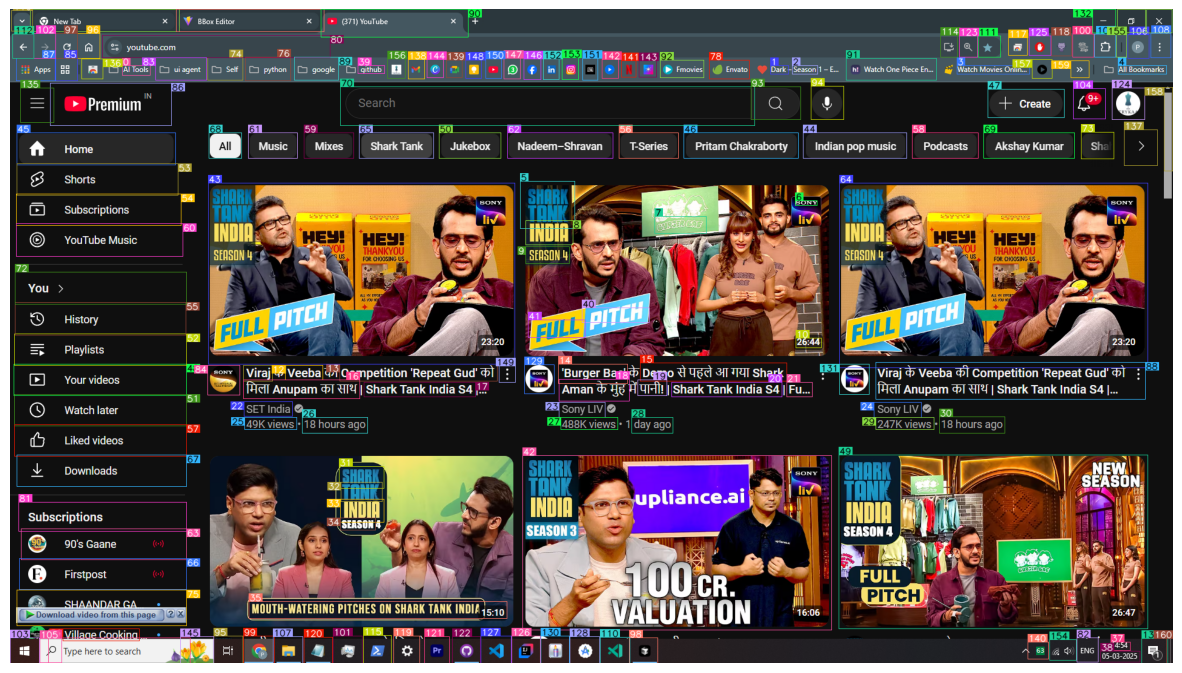

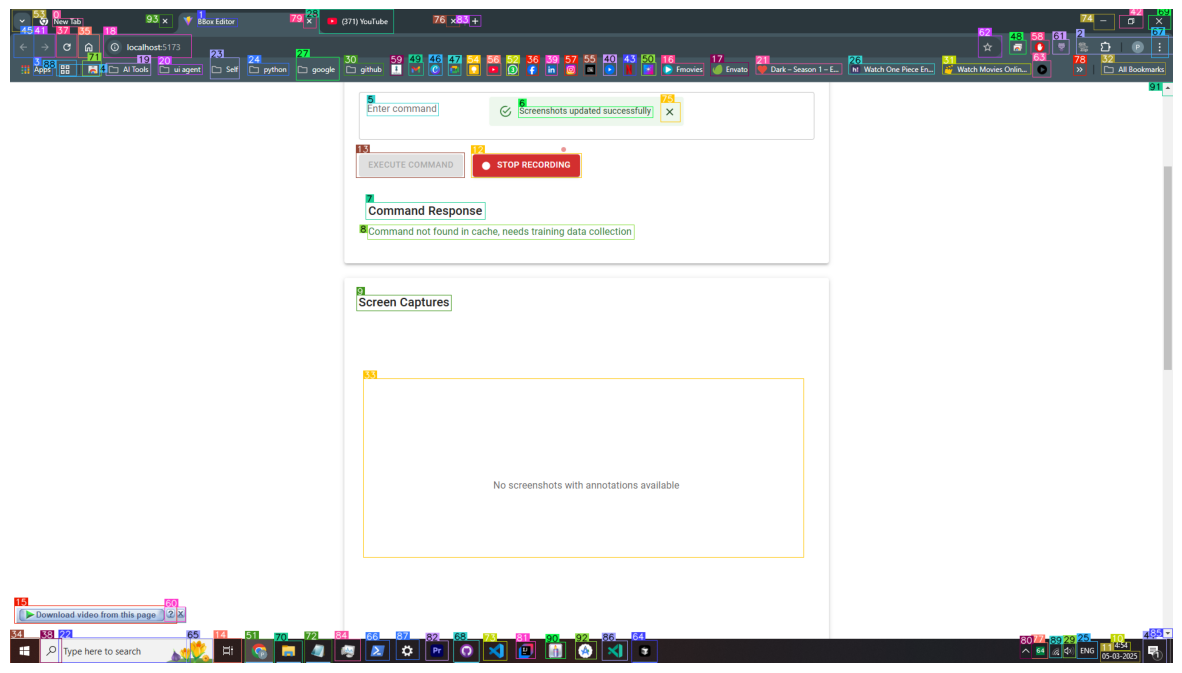

In [5]:
def plot_dino_labled_img(omniparser_result_model: OmniParserResultModel):
    # plot dino_labled_img it is in base64
    import base64
    import matplotlib.pyplot as plt
    import io
    from PIL import Image
    plt.figure(figsize=(15,15))

    image = Image.open(io.BytesIO(base64.b64decode(omniparser_result_model.omniparser_result.dino_labled_img)))
    plt.axis('off')

    plt.imshow(image)
    # print(len(parsed_content_list))
    
for omniparser_result_model in omni_inference_data:
    plot_dino_labled_img(omniparser_result_model)


In [13]:
for result in omni_inference_data:
    print(result.to_dict())

{'event_id': 'ca65bcd4-f94b-43ee-8088-4ff9e9098b39', 'project_uuid': 'youtube.com', 'command_uuid': '123e4567-e89b-12d3-a456-426614174000', 'timestamp': '2025-03-05T14:54:13.315744', 'description': 'Mouse clicked at (492, 0) with Button.left', 'omniparser_result': {'dino_labled_img': 'iVBORw0KGgoAAAANSUhEUgAAB4AAAAQ4CAIAAABnsVYUAAEAAElEQVR4nOzdd2BTVd8H8O89ubnZ6d4D2jLLXrK3LBEFBBEcqKCAjzjBPVFwAC7cghMRERFBZMlSBGTPMsvo3k3TzJube58/0qZpmu4B6Pm8z/s8ybn3nnPTpiH53pPfYdr17A8PLz9Q5HmXsFzbjtOz0/fmZR9BBTq/uPjW408f/YLnje5GjtN36PGo2ZSZeeVPnV+z0OieGZe3ZaXvde9weUhgxa4o6joy95NWV/sUKKphBC3IuNqnQFHXqIh+RdXvRFEURVEURVFUnWTu9rvap9DwXB8ipv4gu9onUuabyc6rfj7fTHayVe9BQIhMTmRyn1sZwhAZB0I8G3neePHM6hsGzm/WYjQrV6Ulb/FMn12j1vO8KerqmjsA7f887b479QcZfVZT1y0/z5Tt5IC2ns9tirpOlXsvy4vC34Wi3ckNCoaSeO0pFgjiP/lQsmzPAKi9t1IURVEURVEU1XSMgmgWSBAHruyduXjO7Lxsdt9lQpQkTEHCFXDtIkLYlSdZRUZF2IHBKP+OvonnlHh+DLlGYiJ39HwVz8d1DiUBtNfEZzdBsJ04sAQQfW41Fl48svetilsL809vWzclMLSTyZRuMaY13DlTFEVRFEXVmFEonnhQvGiGnNj85dpVXUm02r2R/yHN+voFcASCCAXRfN